In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

Automatically created module for IPython interactive environment


## Inspired by https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


### Generate datasets. We choose the size big enough to see the scalability of the algorithms, but not too big to avoid too long running times

In [3]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.zeros(n_samples)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

datasets = [
    (noisy_circles),
    (noisy_moons),
    (varied),
    (aniso),
    (blobs),
    (no_structure)]

### Generated dataset with different clusters with different colours

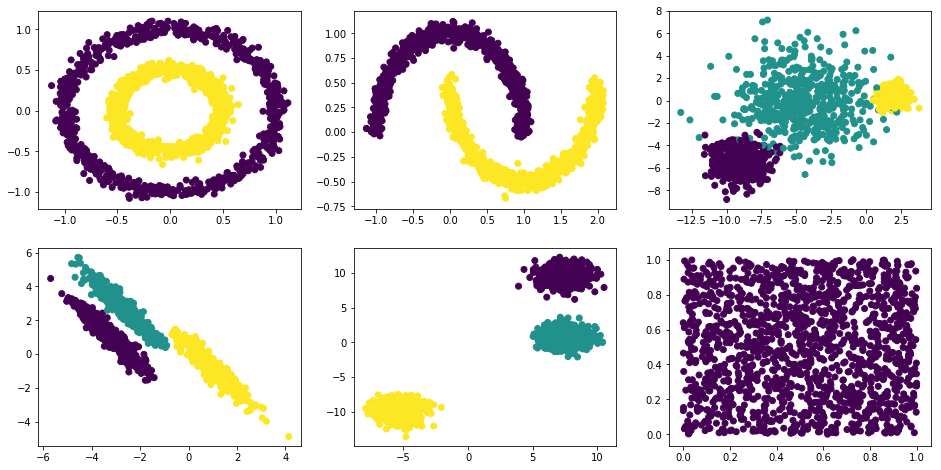

In [4]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16,8))

for i_dataset, dataset in enumerate(datasets):
    X, y = datasets[i_dataset]
    axes[i_dataset//3][i_dataset%3].scatter(X[:,0], X[:,1], c=y)

In [21]:
import time
# # import some data to play with
# iris = datasets.load_iris()
# # Take the first two features. We could avoid this by using a two-dim dataset
# X = iris.data[:, :2]
# y = iris.target

def svm_plot(dataset, file_name="", save=False, suptitle=""):
    X, y = dataset
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, C=C))
    
    models_store = []
    time_store = []
    for clf in models:
        
        t0 = time.time()
        trained = clf.fit(X, y)
        t1 = time.time()
        models_store.append(trained)
        time_store.append(round(t1 - t0, 3))
    
    models = models_store # rename
    
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2, figsize=(16, 8))

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    fig.suptitle(suptitle, size=30)
    for clf, title, ax, runtime in zip(models, titles, sub.flatten(), time_store):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(f"{title}, Run time: {runtime}")
    if save:
        plt.savefig(file_name)
    plt.show()

In [22]:
dataset_names = ['noisy circles',
 'noisy moons',
 'varied',
 'aniso',
 'blobs',
 'no structure']

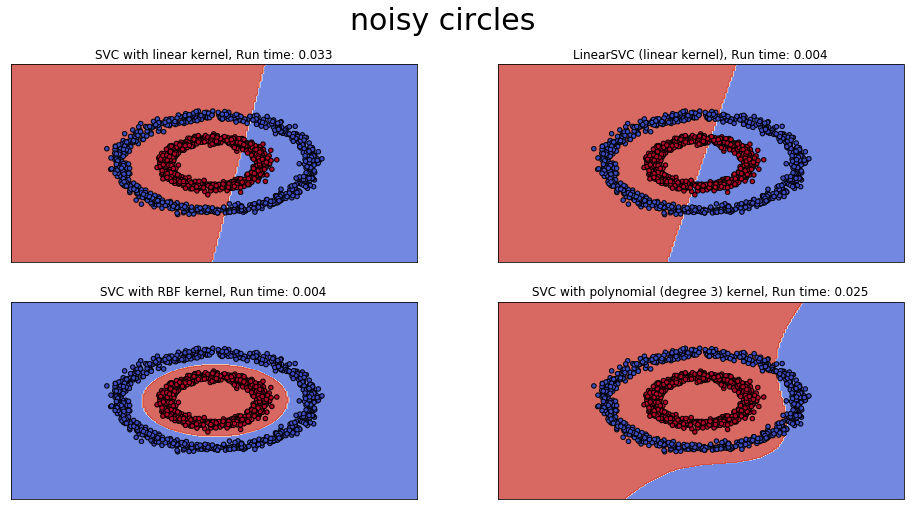

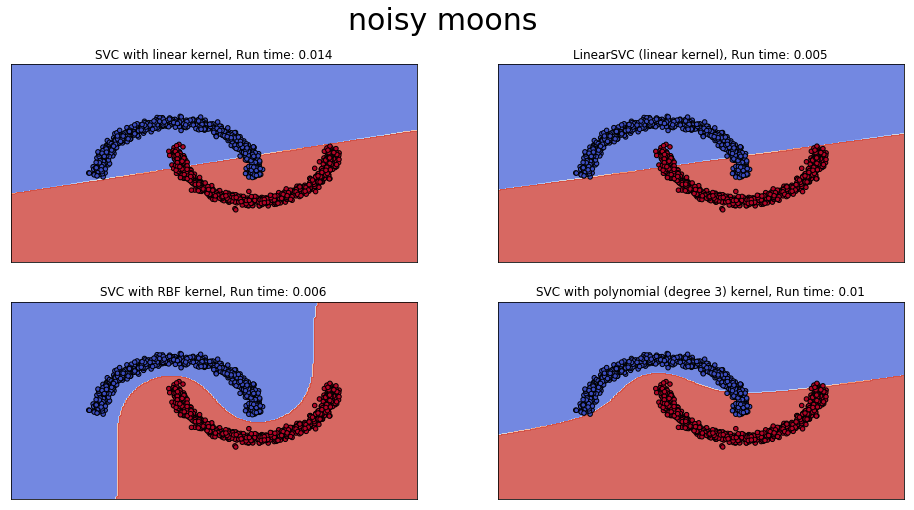

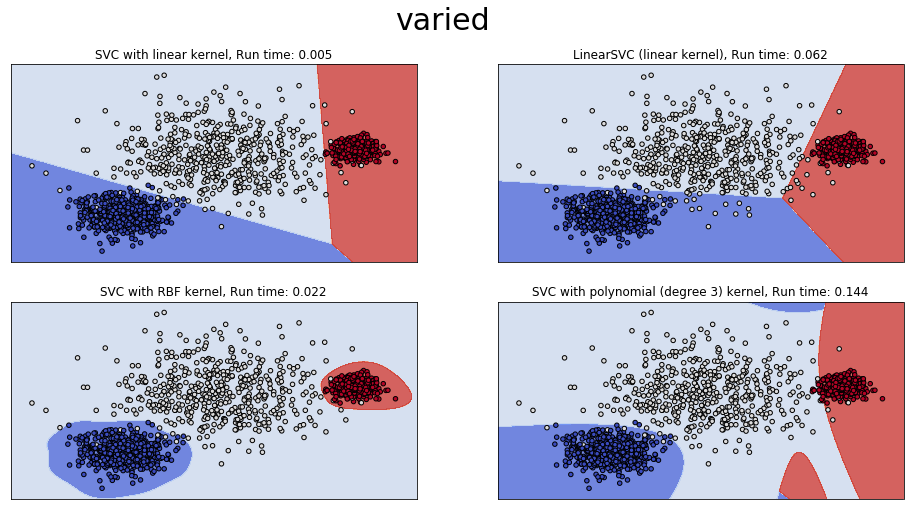

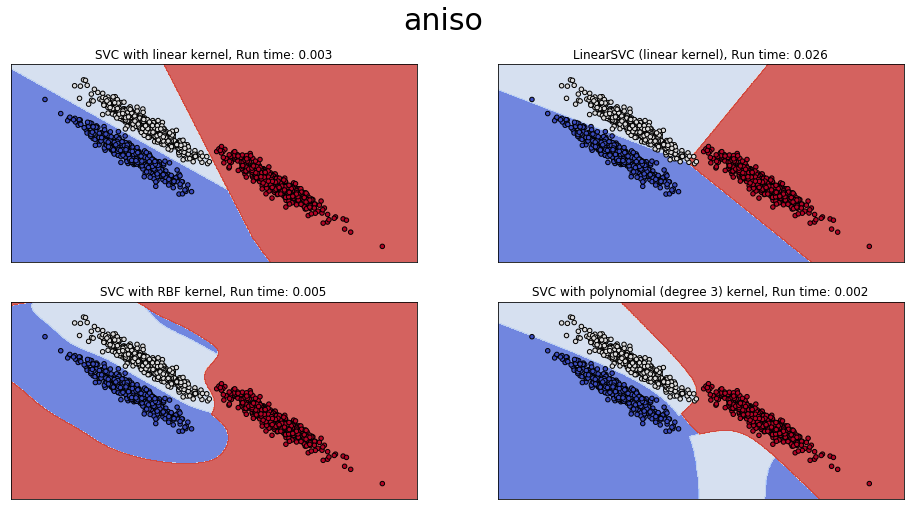

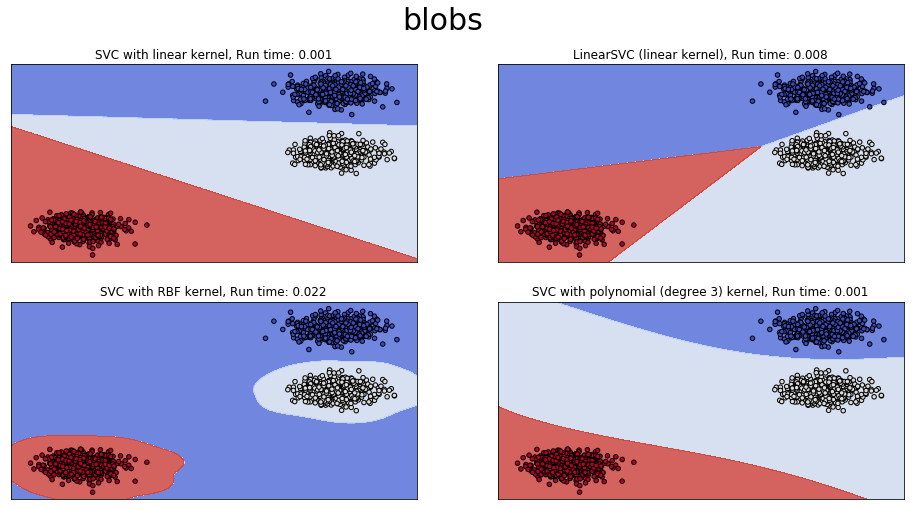

In [23]:
for i in range(len(datasets)-1):
    dataset = datasets[i]
    svm_plot(dataset, file_name=f"{i}.png", save=False, suptitle=dataset_names[i])